In [52]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

style.use('ggplot')

In [53]:
class K_means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for j in range(self.k):
                self.classifications[j] = []
                
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100) > self.tol:
                    optimized = False
                    
                if optimized:
                    break
                
                
        
    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        
        return classification

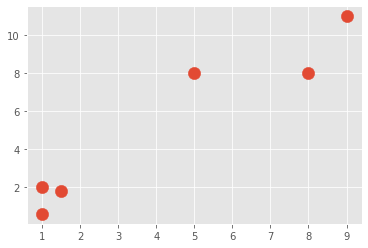

In [54]:
X = np.array([[1,2],
             [1.5,1.8],
             [5,8],
             [8,8],
             [1,0.6],
             [9,11]])

colors = 10*["g","r","c","b","k"]

plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

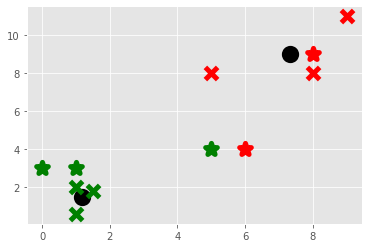

In [55]:
clf = K_means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
               marker = 'o', color='k', s=150, linewidths=5)
    
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=colors[classification], s=150, linewidth=5)

unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],
                    ])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker='*', color=colors[classification], s=150, linewidth=5)

plt.show()

<h2> Test with titanic data </h2>

In [63]:
#convert all data to numeric
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_values = {}
        def convert_to_int(val):
            return text_digit_values[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x+=1
                    
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

In [64]:
df = pd.read_excel('titanic.xls')

#remove not interesting colunms 
df.drop(['name','body'], 1, inplace=True)

#Fill NaN with zero
df.fillna(0, inplace=True)

#data treatment, transforming all into numerical type
df = handle_non_numeric_data(df)

#set numbers in table into numeric type
#df.convert_objects(convert_numeric=True)
for column in df.columns.values:
    pd.to_numeric(df[column])
    
df.drop(['boat'], 1, inplace=True)

#all data except survived column
X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = K_means()
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct +=1
        
if correct/len(X) < 0.5:
    percent = 1 - correct/len(X)
else:
    percent = correct/len(X)
    
print('accuracy:', percent)

accuracy: 0.6936592818945759
